In [1]:
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [93]:
# load dataset but select only 3s
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X_3, test_X_3 = (train_X[train_y == 3], test_X[test_y == 3])

# 6131 images, 28x28 = 784px
img_x_size = train_X_3.shape[1]
img_y_size = train_X_3.shape[2]
train_X_3.shape

(6131, 28, 28)

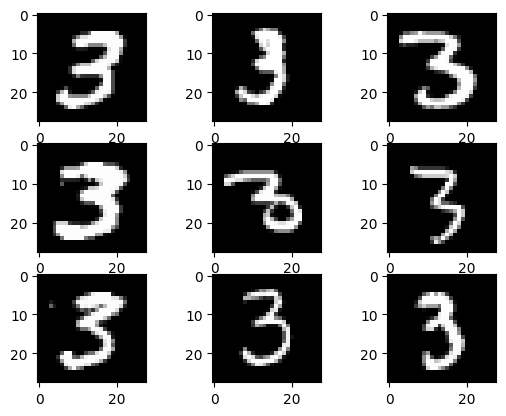

In [94]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(3):
  for j in range(3):
    axs[i][j].imshow(train_X_3[i*3+j], cmap=plt.get_cmap('gray'))
plt.show()

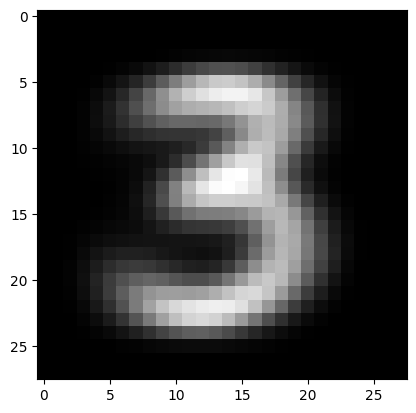

In [95]:
# get average three representation
avg_3_img = np.average(train_X_3, axis=0)
ax = plt.subplot()
ax.imshow(avg_3_img, cmap=plt.get_cmap('gray'))

<Axes: >

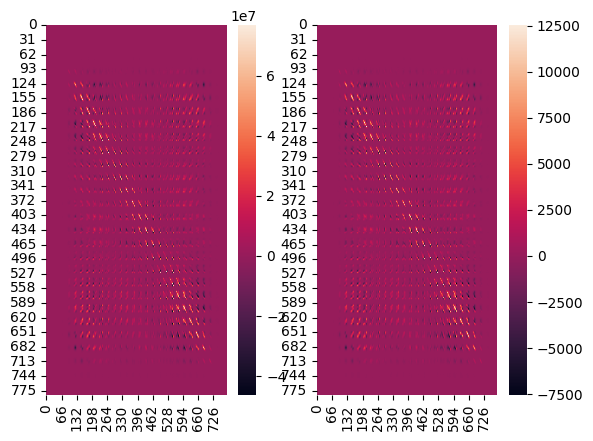

In [96]:
import seaborn as sns
from sklearn.decomposition import PCA

data = (train_X_3 - avg_3_img).reshape(train_X_3.shape[0], img_x_size*img_y_size)
cov = data.T @ data

# validation with PCA
pca = PCA(n_components=784).fit(data)
pca_cov = pca.get_covariance()

# it's just scaled by a scalar
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.heatmap(cov, ax=axs[0])
sns.heatmap(pca_cov, ax=axs[1])

In [97]:
np.sum(cov - pca_cov)

349842542514.80426

In [98]:
var_per=0.98

eigvals, eigvects = np.linalg.eigh(cov)
evecs = eigvects.T[::-1]

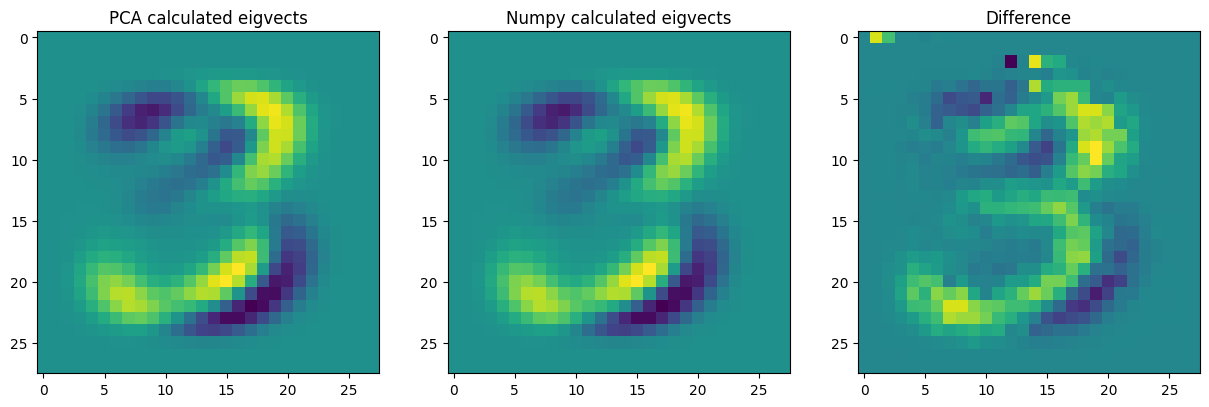

In [99]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

vect_idx = 0

axs[0].imshow(pca.components_[vect_idx].reshape(28,28))
axs[0].set_title('PCA calculated eigvects')

axs[1].imshow(evecs[vect_idx].reshape(28,28))
axs[1].set_title('Numpy calculated eigvects')

diff = evecs[vect_idx].reshape(28,28) - pca.components_[vect_idx].reshape(28,28)
axs[2].imshow(diff)
axs[2].set_title('Difference')
plt.show()

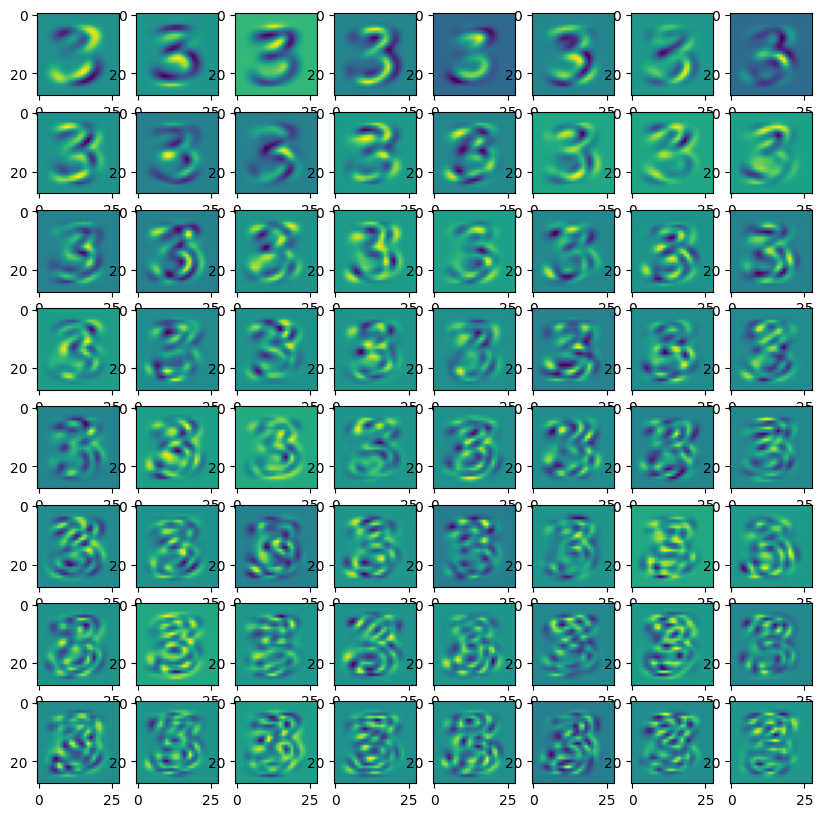

In [100]:
num_of_vectors_to_use = 64
num_of_vects_cols = np.sqrt(num_of_vectors_to_use).astype(int)
num_of_vects_row = np.sqrt(num_of_vectors_to_use).astype(int)

fig, axs = plt.subplots(nrows=num_of_vects_row, ncols=num_of_vects_cols, figsize=(10, 10))
for i in range(num_of_vects_row):
    for j in range(num_of_vects_cols):
        axs[i][j].imshow(evecs[i*num_of_vects_cols+j].reshape(img_x_size, img_y_size))

plt.show()

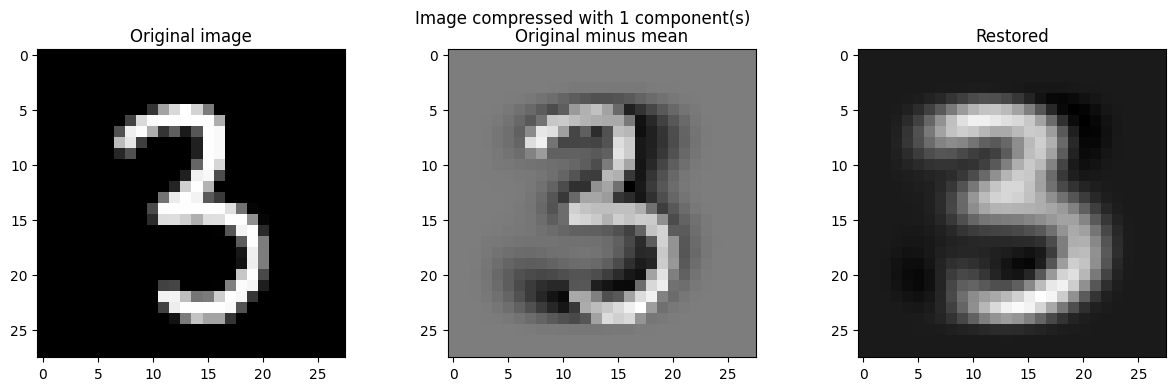

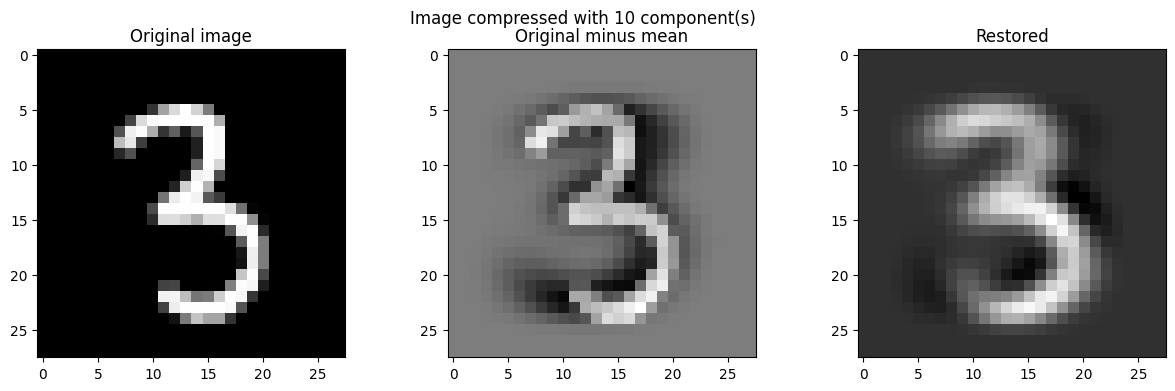

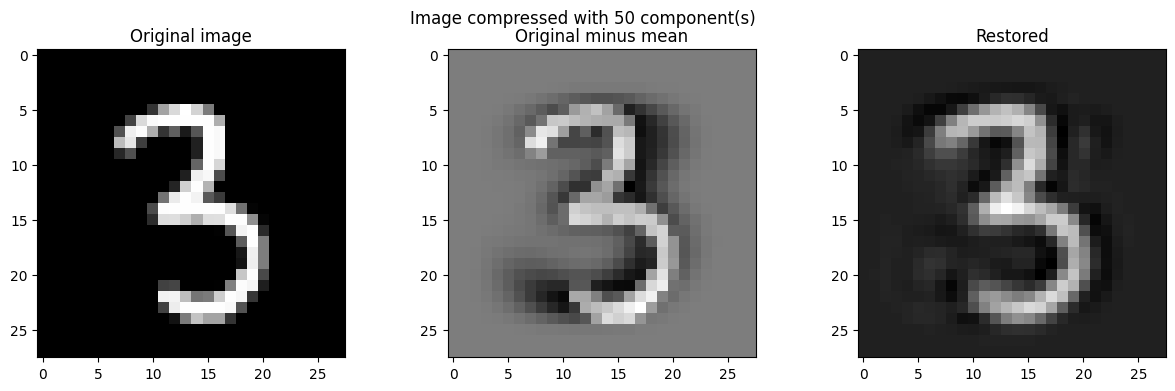

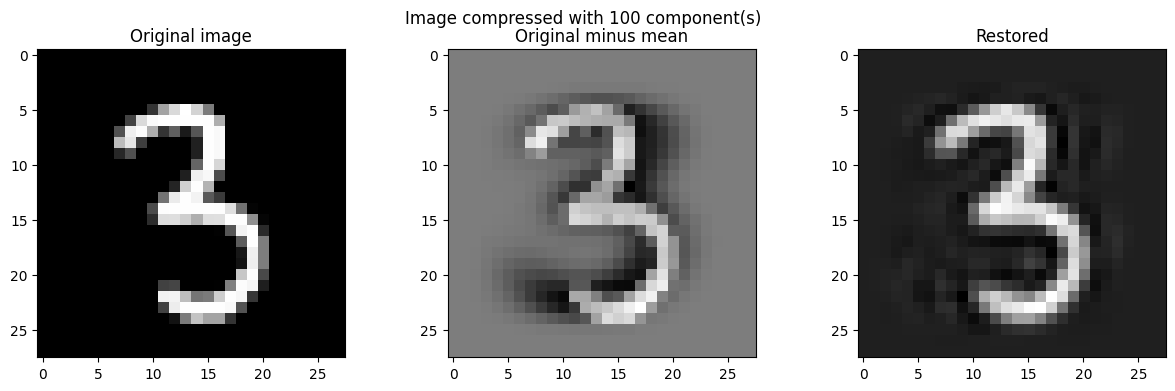

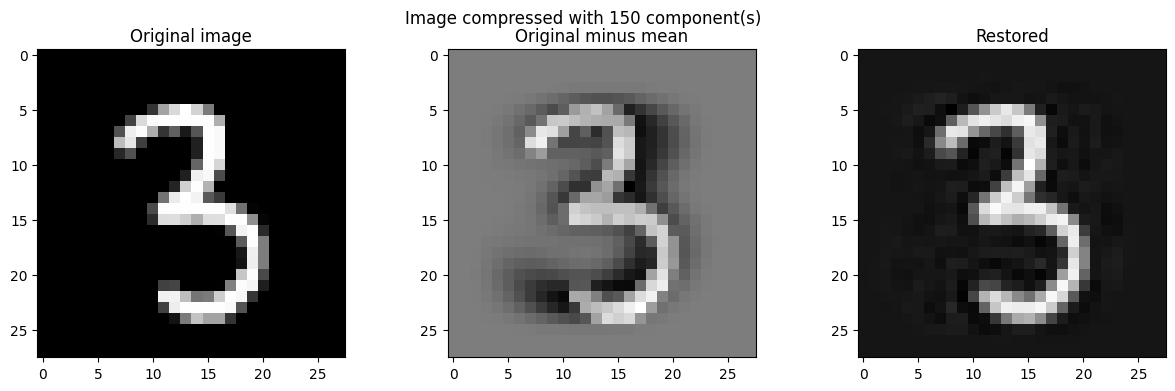

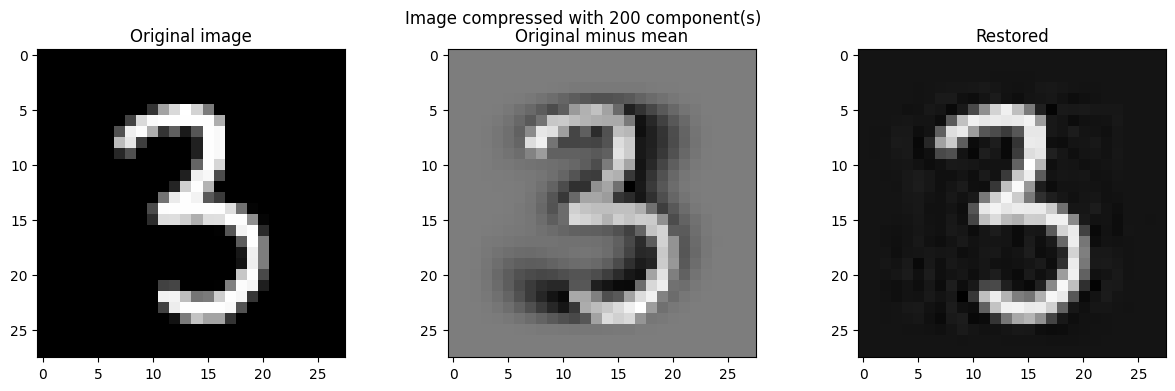

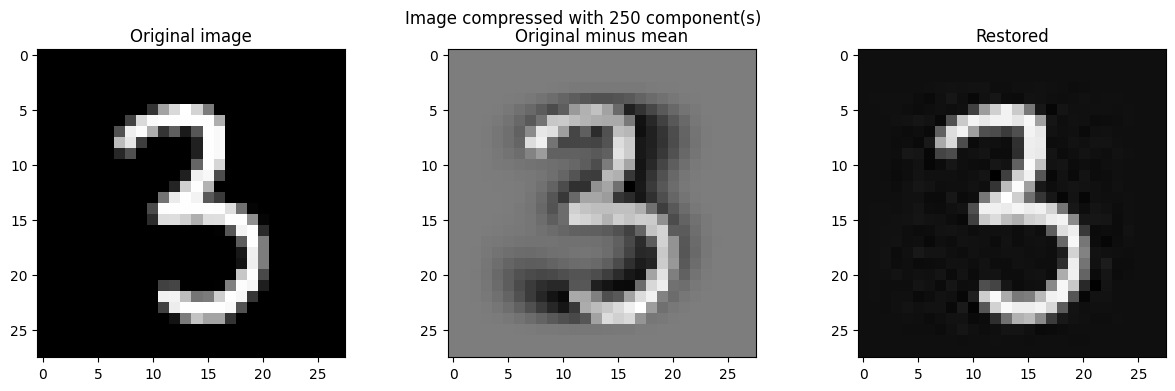

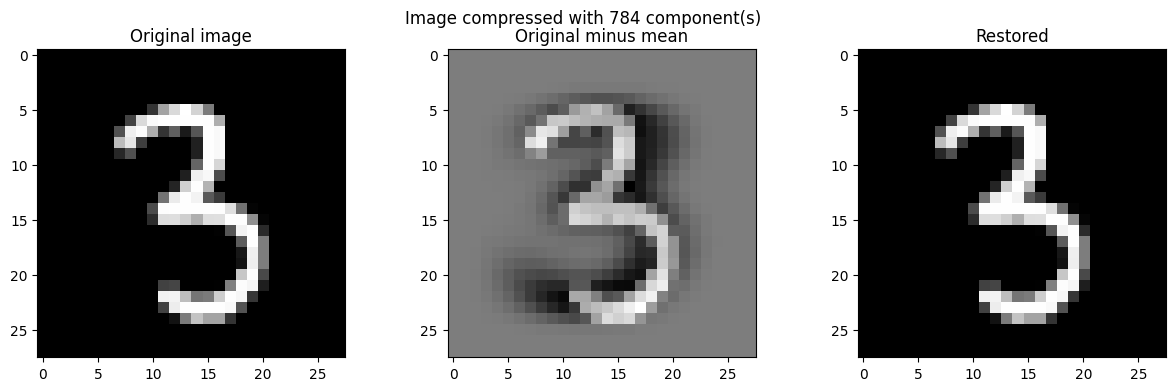

In [104]:
orig_img = train_X_3[15]

def compress_with_components(_img, avg_img, n_components: int):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    fig.suptitle(f"Image compressed with {n_components} component(s)")
    
    ctx3_minus_mean = _img - avg_img
    axs[0].imshow(orig_img, cmap=plt.get_cmap('gray'))
    axs[0].set_title("Original image")
    
    axs[1].imshow(ctx3_minus_mean, cmap=plt.get_cmap('gray'))
    axs[1].set_title("Original minus mean")
    
    # reshape input image to 1x784
    reshaped_ctx3_minux_mean = ctx3_minus_mean.reshape(1, img_x_size*img_y_size)

    # 1x784 @ 784xn -> 1xn (n values characterizing original image)
    ctx3_vectored = reshaped_ctx3_minux_mean @ evecs[0:n_components].T

    # restoration 1xn @ nx784 -> 1x784
    uncompressed = ctx3_vectored @ evecs[0:n_components]
    restored_img = uncompressed.reshape(reshp_to, reshp_to) + avg_img

    axs[2].imshow(restored_img.astype(float), cmap=plt.get_cmap('gray'))
    axs[2].set_title("Restored")
    plt.show()
    
compress_with_components(orig_img, avg_3_img, 1)
compress_with_components(orig_img, avg_3_img, 10)
compress_with_components(orig_img, avg_3_img, 50)
compress_with_components(orig_img, avg_3_img, 100)
compress_with_components(orig_img, avg_3_img, 150)
compress_with_components(orig_img, avg_3_img, 200)
compress_with_components(orig_img, avg_3_img, 250)

# basically original image
compress_with_components(orig_img, avg_3_img, 784)